### Acquire Data Exercises

In [1]:
import pandas as pd
import numpy as np
import os
import acquire
import prepare
import matplotlib

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# acquire
from env import host, user, password
from pydataset import data

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
iris_df = data('iris')

In [3]:
iris_df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
iris_df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
df_excel = pd.read_excel('spreadsheet_exercises.xlsx')
df_excel.head(5)
# or
# df_excel.iloc[0:100]

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,start_date,avg_monthly_charges,contract_type.1,phone_service.1,internet_service.1
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,...,False,True,True,True,0,2020-08-10 13:46:58.656,65.6,1 Year,One Line,DSL
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,...,False,True,True,True,1,2021-01-17 09:42:13.248,59.9,Month-to-Month,Two or More Lines,DSL
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,...,True,True,True,True,1,2020-04-23 19:16:50.304,73.9,Month-to-Month,One Line,Fiber Optic
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,...,True,True,True,True,2,2021-02-05 01:23:48.480,98.0,Month-to-Month,One Line,Fiber Optic
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,...,True,True,True,True,1,2020-09-04 13:04:14.304,83.9,Month-to-Month,One Line,Fiber Optic


In [9]:
# df_excel.columns = df_excel.iloc[0]
# df_excel = df_excel.drop(df_excel.index[0])

In [10]:
df_excel_sample = df_excel.head(101)

In [11]:
# prints # of rows
df_excel.shape[0]

7049

In [12]:
# prints columns 1 through 5
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [13]:
df_excel.dtypes

customer_id                       object
gender                            object
is_senior_citizen                  int64
partner                           object
dependents                        object
phone_service                      int64
internet_service                   int64
contract_type                      int64
payment_type                      object
monthly_charges                  float64
total_charges                    float64
churn                             object
tenure                           float64
is_female                           bool
has_churned                         bool
has_phone                           bool
has_internet                        bool
has_phone_and_internet              bool
partner_dependents                 int64
start_date                datetime64[ns]
avg_monthly_charges              float64
contract_type.1                   object
phone_service.1                   object
internet_service.1                object
dtype: object

In [14]:
df_excel.select_dtypes(include='object').columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn', 'contract_type.1', 'phone_service.1', 'internet_service.1'],
      dtype='object')

In [15]:
df_excel.select_dtypes(include=['int','float']).columns

Index(['is_senior_citizen', 'phone_service', 'internet_service',
       'contract_type', 'monthly_charges', 'total_charges', 'tenure',
       'partner_dependents', 'avg_monthly_charges'],
      dtype='object')

In [16]:
# finding range of numerical columns
# first isolate my numerical columns
df_numerical = df_excel.select_dtypes(include=[np.number])
df_numerical

,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,partner_dependents,avg_monthly_charges
0,0,1,1,1,65.60,593.30,9.044207,0,65.60
1,0,2,1,0,59.90,542.40,9.055092,1,59.90
2,0,1,2,0,73.90,280.85,3.800406,1,73.90
3,1,1,2,0,98.00,1237.85,12.631122,2,98.00
4,1,1,2,0,83.90,267.40,3.187128,1,83.90
...,...,...,...,...,...,...,...,...,...
7044,0,1,1,1,55.15,742.90,13.470535,0,55.15
7045,0,2,2,0,85.10,1873.70,22.017626,3,85.10
7046,0,1,1,0,50.30,92.75,1.843936,3,50.30
7047,0,1,1,2,67.85,4627.65,68.204127,-1,67.85


In [17]:
df_numerical.max()-df_numerical.min()

is_senior_citizen         1.000000
phone_service             2.000000
internet_service          2.000000
contract_type             2.000000
monthly_charges         100.500000
total_charges          8666.000000
tenure                   79.341772
partner_dependents        4.000000
avg_monthly_charges     118.750000
dtype: float64

Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [18]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [19]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [20]:
df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [21]:
df_googlesheet.shape

(891, 12)

In [22]:
list(df_googlesheet.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [23]:
df_googlesheet.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [24]:
df_googlesheet.select_dtypes(include=[np.number]).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df_googlesheet.select_dtypes(include=[np.object]).nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

#### Exercises
The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name.

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [26]:
# Use the function defined in acquire.py to load the iris data.
iris_df = acquire.get_iris_data()
iris_df.head(5)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [27]:
# Drop the species_id and measurement_id columns.

iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [28]:
# Rename the species_name column to just species.
iris_df = iris_df.rename(columns={'species_name': 'species'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [29]:
# Create dummy variables of the species name.
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False)
dummy_df.head(3)

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0


In [30]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied.
def prep_iris(iris_df):
    iris_df = iris_df.drop(columns=['species_id', 'measurement_id'])
    iris_df = iris_df.rename(columns={'species_name': 'species'})
    dummy_df = pd.get_dummies(iris_df[['species']])
    iris_df = pd.concat([iris_df, dummy_df], axis=1)
    return iris_df

In [31]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [32]:
iris_df = prep_iris(iris_df)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [33]:
# iris_df = prepare.prep_iris(iris_df)

#### Extra Practice
2.  Prepare Titanic Data - Challenge/Bonus Exercises
- 2.1  Use the function you defined in acquire.py to load the titanic dataset.
- 2.2  Handle the missing values in the embark_town and embarked columns.
- 2.3  Remove the deck column.
- 2.4  Create a dummy variable of the embarked column.
- 2.5  Split Data
- 2.5.1  Create a helper function to split titanic data into train, validate, test datasets
- 2.6  Fill or impute the missing values in age.
- 2.6.1  Build a helper function for imputing
- 2.7  Create a prep_titanic function that accepts the untransformed titanic data and returns the data with the transformations above applied.

In [34]:
# Use the function you defined in acquire.py to load the titanic dataset.
titanic_df = acquire.get_titanic_data()
titanic_df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1


In [35]:
# see where our missing values are
missing = titanic_df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [36]:
# Handle the missing values in the embark_town and embarked columns.
titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')

In [37]:
# Remove the deck column.
titanic_df = titanic_df.drop(columns=['embarked', 'deck'])

In [38]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,First,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1


In [39]:
# Create a dummy variable of the embarked column.
dummy_df = pd.get_dummies(titanic_df[['embark_town']])
dummy_df.head(3)

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,1
1,1,0,0
2,0,0,1


In [40]:
# Split Data
train, test = train_test_split(titanic_df, test_size=0.2, random_state=4321, stratify=titanic_df.survived)
train, validate = train_test_split(train, train_size=0.7, random_state=4321, stratify=train.survived)

In [41]:
# finish titanic

## Exploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

- Acquire, prepare & split your data.

In [42]:
# acquire my data
iris = acquire.get_iris_data()
iris.sample(5)

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
56,2,57,6.3,3.3,4.7,1.6,versicolor
111,3,112,6.4,2.7,5.3,1.9,virginica
34,1,35,4.9,3.1,1.5,0.2,setosa
149,3,150,5.9,3.0,5.1,1.8,virginica
21,1,22,5.1,3.7,1.5,0.4,setosa


In [43]:
iris = prep_iris(iris)

In [44]:
# prepare my data
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
14,5.8,4.0,1.2,0.2,setosa,1,0,0
87,6.3,2.3,4.4,1.3,versicolor,0,1,0
27,5.2,3.5,1.5,0.2,setosa,1,0,0
36,5.5,3.5,1.3,0.2,setosa,1,0,0
134,6.1,2.6,5.6,1.4,virginica,0,0,1


In [45]:
iris = iris.drop(columns=['species_setosa'])

In [46]:
iris.shape

(150, 7)

In [47]:
# split my data into train and test (train is 80% and test is 20%)
train, test = train_test_split(iris, test_size=0.2, random_state=4321, stratify=iris.species)

# split my train into train and validate (train is 70% and validate is 30%)
train, validate = train_test_split(train, train_size=0.7, random_state=4321, stratify=train.species)

In [48]:
train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

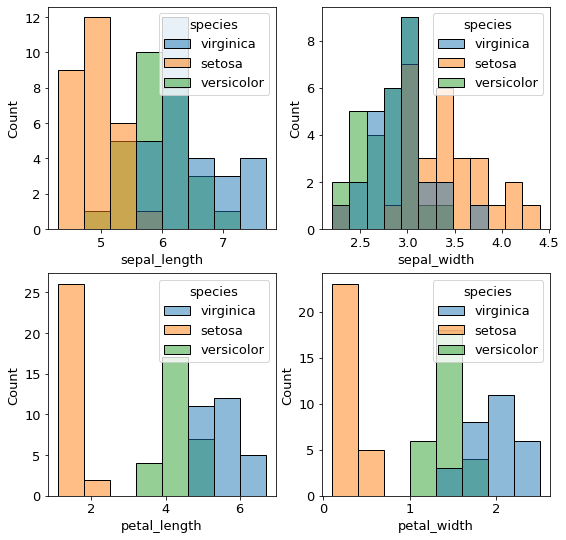

In [49]:
# create a histogram
fig, axs = plt.subplots(2,2, figsize=(9,9))
sns.histplot(data=train, x='sepal_length', ax=axs[0,0], hue='species')
sns.histplot(data=train, x='sepal_width', ax=axs[0,1], hue='species')
sns.histplot(data=train, x='petal_length', ax=axs[1,0], hue='species')
sns.histplot(data=train, x='petal_width', ax=axs[1,1], hue='species')

<AxesSubplot:xlabel='petal_width', ylabel='species'>

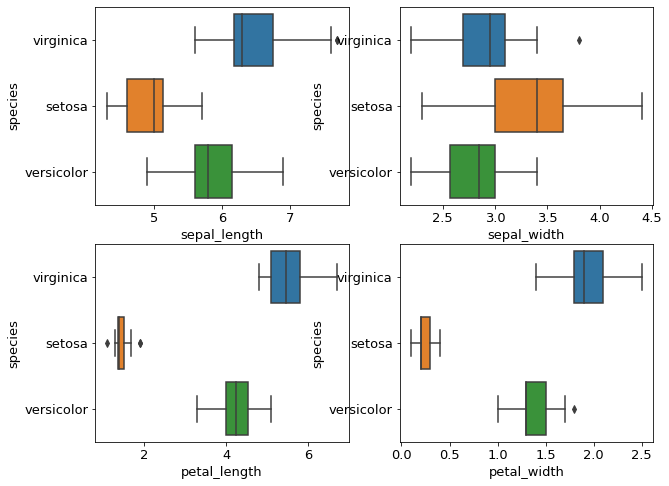

In [50]:
# create a boxplot
fig, ax = plt.subplots(2,2, figsize = (10,8))
sns.boxplot(data = train, x='sepal_length', y='species', ax = ax[0,0])
sns.boxplot(data = train, x='sepal_width', y='species', ax = ax[0,1])
sns.boxplot(data = train, x='petal_length', y='species', ax = ax[1,0])
sns.boxplot(data = train, x='petal_width', y='species', ax = ax[1,1])

In [51]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


In [52]:
# For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

# take a look at dataframe again
train.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
77,6.7,3.0,5.0,1.7,versicolor,1,0
62,6.0,2.2,4.0,1.0,versicolor,1,0
113,5.7,2.5,5.0,2.0,virginica,0,1
45,4.8,3.0,1.4,0.3,setosa,0,0
15,5.7,4.4,1.5,0.4,setosa,0,0


In [53]:
train.species.value_counts()

setosa        28
virginica     28
versicolor    28
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_length'>

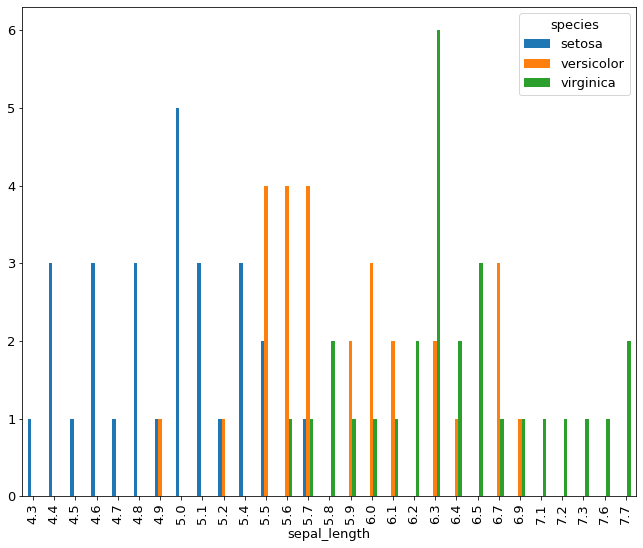

In [54]:
pd.crosstab(train.sepal_length, train.species).plot.bar()

<AxesSubplot:xlabel='sepal_width'>

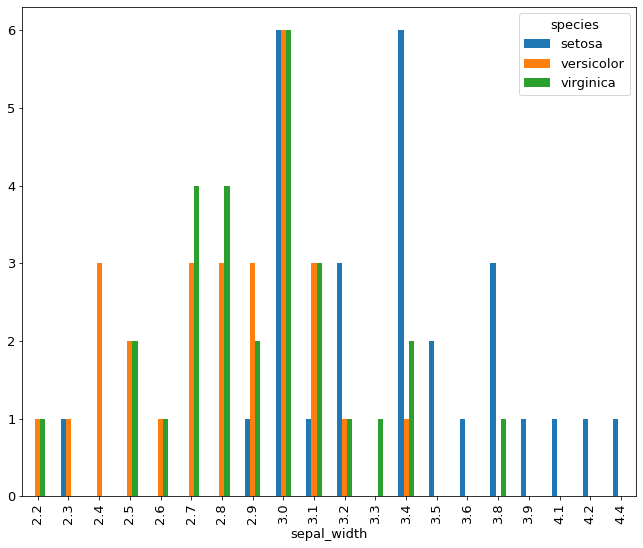

In [55]:
pd.crosstab(train.sepal_width, train.species).plot.bar()

<AxesSubplot:xlabel='petal_length'>

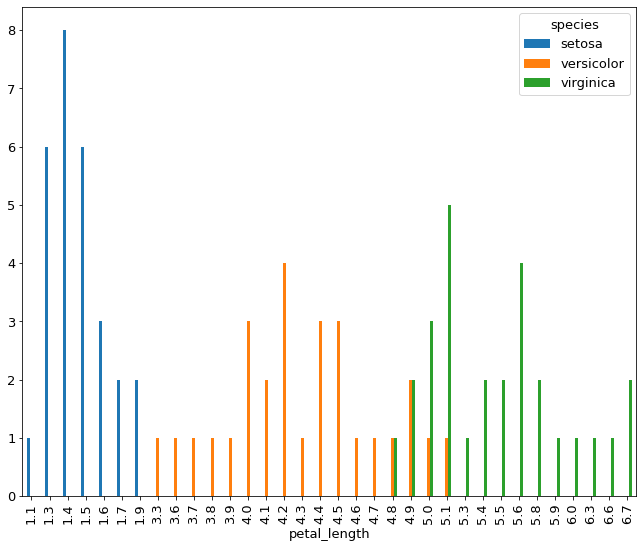

In [56]:
pd.crosstab(train.petal_length, train.species).plot.bar()

<AxesSubplot:xlabel='petal_length'>

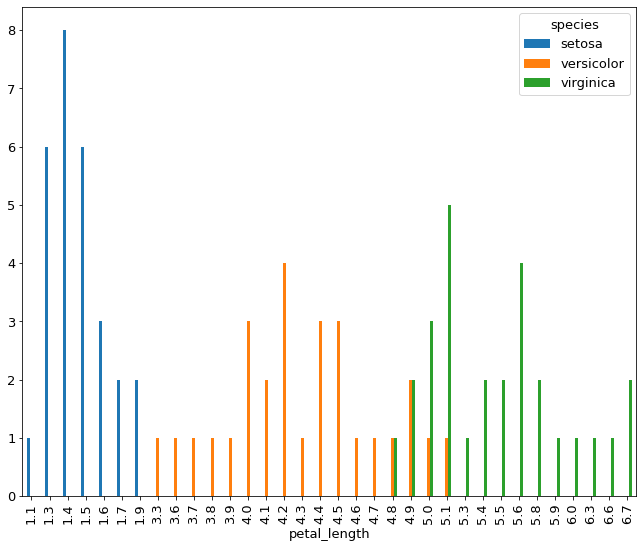

In [57]:
pd.crosstab(train.petal_length, train.species).plot.bar()

In [58]:
# pd.crosstab(train.sepal_length, train.species).plot.bar()
# pd.crosstab(train.sepal_width, train.species).plot.bar()
# pd.crosstab(train.petal_length, train.species).plot.bar()
# pd.crosstab(train.petal_length, train.species).plot.bar()

3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

In [59]:
# Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, 
# adding a horizontal line showing the overall mean of the metric (y-axis).
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
121,5.6,2.8,4.9,2.0,virginica,0,1
18,5.7,3.8,1.7,0.3,setosa,0,0
38,4.4,3.0,1.3,0.2,setosa,0,0
15,5.7,4.4,1.5,0.4,setosa,0,0
77,6.7,3.0,5.0,1.7,versicolor,1,0


In [60]:
# _, ax = plt.subplots(nrows=2, ncols=3, figsize=(16,6), sharey=True)

# sns.barplot

### Exercises
Continue in your classification_exercises.ipynb notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

    What are your takeaways?

4. Create a heatmap of each variable layering correlation coefficient on top.

5. Create a scatter matrix visualizing the interaction of each variable.

6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

    Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

    What is your takeaway from this statistical testing?

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

In [61]:
iris.drop(columns=['species_versicolor','species_virginica'], inplace=True)

In [62]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,setosa
68,6.2,2.2,4.5,1.5,versicolor
24,4.8,3.4,1.9,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
32,5.2,4.1,1.5,0.1,setosa


In [63]:
# split my data into train and test (train is 80% and test is 20%)
train, test = train_test_split(iris, test_size=0.2, random_state=4321, stratify=iris.species)

# split my train into train and validate (train is 70% and validate is 30%)
train, validate = train_test_split(train, train_size=0.7, random_state=4321, stratify=train.species)

In [64]:
# Split your data into train, validate, and test samples.
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [65]:
# Create a swarmplot using a melted dataframe of all your numeric variables. 
# The x-axis should be the variable name, the y-axis the measure. 
# Add another dimension using color to represent species. 
train_melt = train.melt(id_vars='species', var_name='variable', value_name='measure')
train_melt.head(5)

,species,variable,measure
0,virginica,sepal_length,5.8
1,setosa,sepal_length,5.1
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.6
4,setosa,sepal_length,5.0


In [72]:
train.groupby(iris.species).describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    4.935714    5.903571   6.485714
             std     0.382210    0.481111   0.590489
             min     4.300000    4.900000   5.600000
             25%     4.600000    5.600000   6.175000
             50%     5.000000    5.800000   6.300000
             75%     5.125000    6.150000   6.750000
             max     5.700000    6.900000   7.700000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.389286    2.800000   2.928571
             std     0.453251    0.298142   0.323015
             min     2.300000    2.200000   2.200000
             25%     3.000000    2.575000   2.700000
             50%     3.400000    2.850000   2.950000
             75%     3.650000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.467857    4.296429   5.514286
             std     0.180644    0.436724   0.550228
             min     1.100000    3.300000   4.800000
             25%     1.375000    4.000000   5.100000
             50%     1.400000    4.250000   5.450000
             75%     1.525000    4.525000   5.800000
             max     1.900000    5.100000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.242857    1.353571   1.946429
             std     0.092009    0.199039   0.274175
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.300000   1.800000
             50%     0.200000    1.300000   1.900000
             75%     0.300000    1.500000   2.100000
             max     0.400000    1.800000   2.500000
sepal_area   count  28.000000   28.000000  28.000000
             mean   16.855000   16.583929  19.075000
             std     3.375866    2.615166   3.295220
             min    10.350000   11.760000  13.200000
             25%    14.400000   14.442500  16.722500
             50%    16.660000   16.385000  19.500000
             75%    19.282500   18.365000  21.202500
             max    25.080000   21.390000  29.260000
petal_area   count  28.000000   28.000000  28.000000
             mean    0.362500    5.881429  10.781071
             std     0.162290    1.373656   2.149195
             min     0.110000    3.300000   7.500000
             25%     0.275000    5.200000   9.445000
             50%     0.310000    5.525000  10.035000
             75%     0.420000    6.825000  12.505000
             max     0.760000    8.640000  15.000000

<AxesSubplot:xlabel='variable', ylabel='measure'>

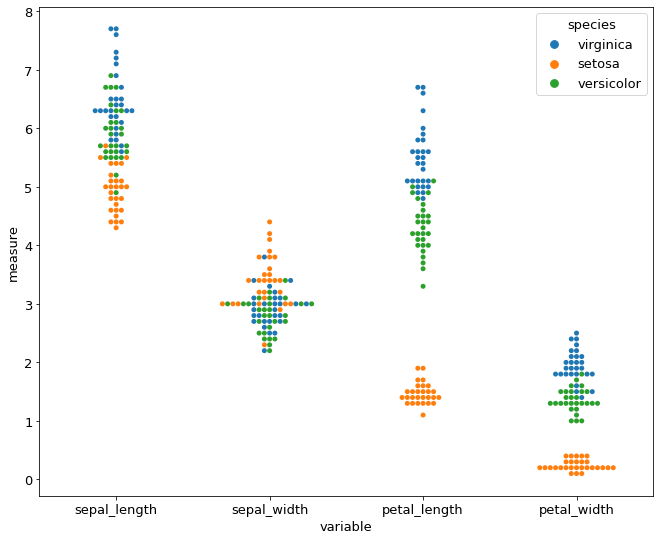

In [67]:
sns.swarmplot(data=train_melt, x='variable',y='measure',hue='species')

Document takeaways from this visualization:
- petal length and petal width are widely different
- sepal measurement is too similar to be a good identifier

In [68]:
# create new columns for area
train = train.assign(sepal_area = (train.sepal_length * train.sepal_width), petal_area = (train.petal_length * train.petal_width))

In [69]:
train.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
3,4.6,3.1,1.5,0.2,setosa,14.26,0.30
64,5.6,2.9,3.6,1.3,versicolor,16.24,4.68
85,6.0,3.4,4.5,1.6,versicolor,20.40,7.20


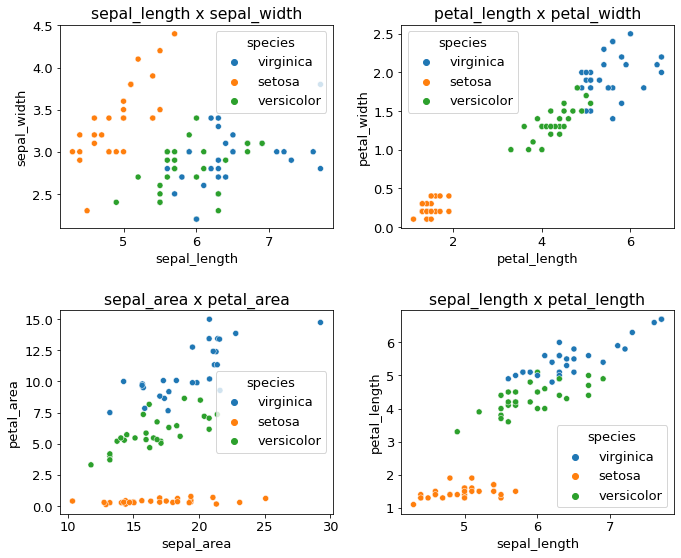

In [70]:
# Create 4 subplots (2 rows x 2 columns) of scatterplots
plt.subplot(221)
sns.scatterplot(data=train, x='sepal_length', y='sepal_width', hue='species')
plt.title('sepal_length x sepal_width')

plt.subplot(222)
sns.scatterplot(data=train, x='petal_length', y='petal_width', hue='species')
plt.title('petal_length x petal_width')

plt.subplot(223)
sns.scatterplot(data=train, x='sepal_area', y='petal_area', hue='species')
plt.title('sepal_area x petal_area')

plt.subplot(224)
sns.scatterplot(data=train, x='sepal_length', y='petal_length', hue='species')
plt.title('sepal_length x petal_length')

plt.subplots_adjust(wspace=.25, hspace=.4)

plt.show()

In [73]:
# Create a heatmap of each variable layering correlation coefficient on top.
train.corr()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.134467,0.877538,0.818533,0.655856,0.854001
sepal_width,-0.134467,1.000000,-0.415530,-0.361943,0.655328,-0.293389
petal_length,0.877538,-0.415530,1.000000,0.965303,0.356397,0.962327
petal_width,0.818533,-0.361943,0.965303,1.000000,0.356736,0.979682
sepal_area,0.655856,0.655328,0.356397,0.356736,1.000000,0.435968
petal_area,0.854001,-0.293389,0.962327,0.979682,0.435968,1.000000


<AxesSubplot:>

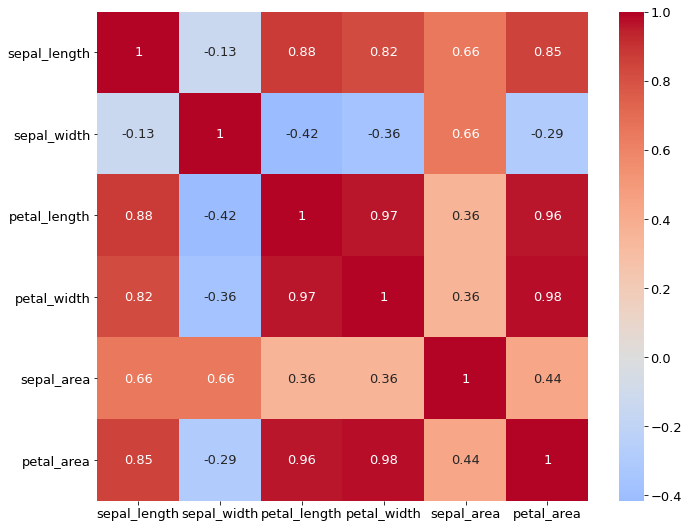

In [74]:
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center=0)

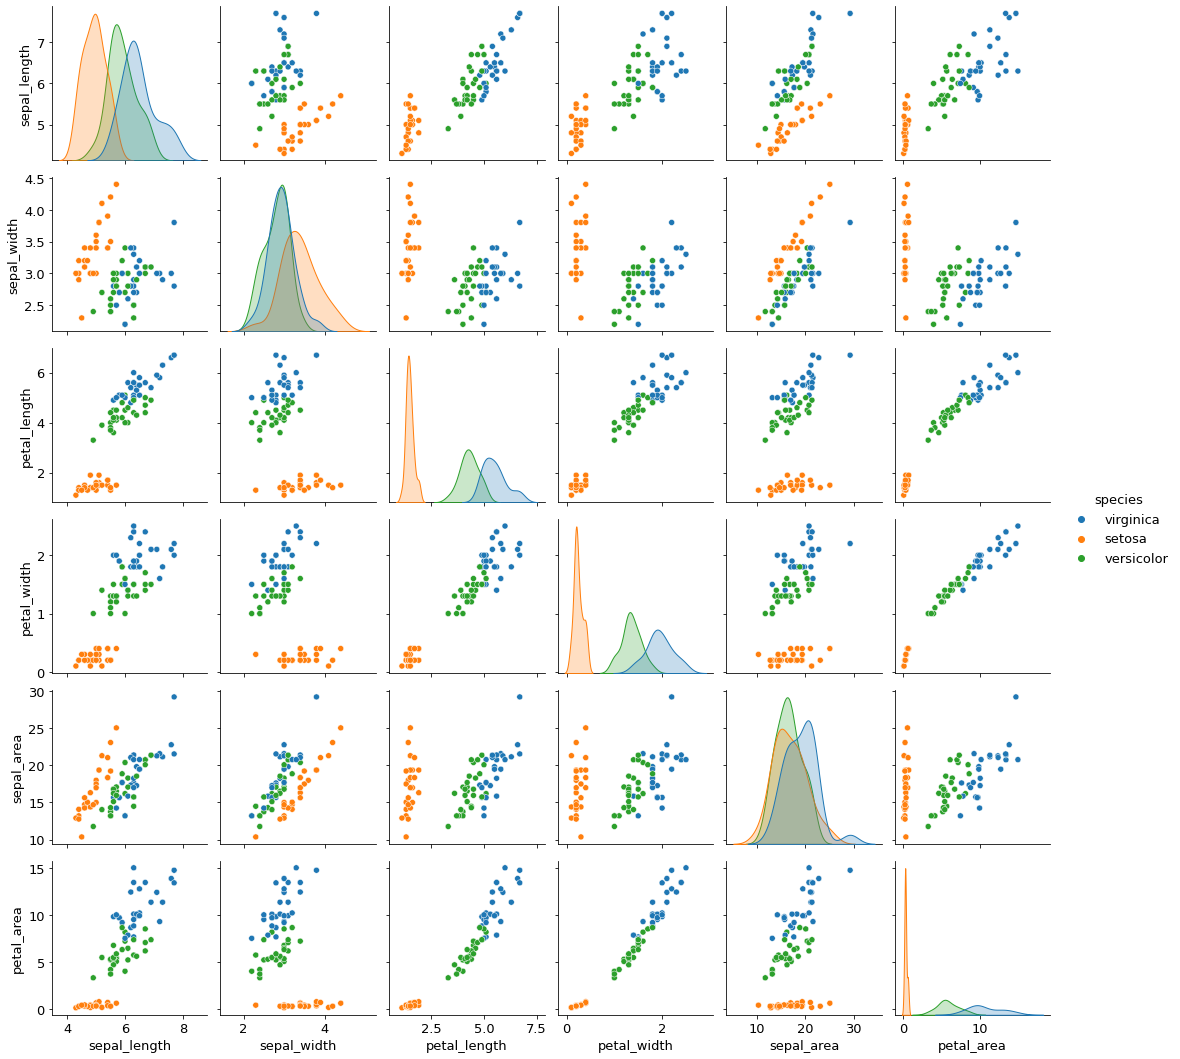

In [75]:
# Create a scatter matrix visualizing the interaction of each variable.
sns.pairplot(data=train, hue='species')

$H_{0}$ = there is no significant difference in sepal_length, virginica v versicolor\
$H_{a}$ = there is a significent difference in sepal_length, virginica v versicolor

In [76]:
# Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.
# Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

alpha = 0.05

In [77]:
train.groupby('species').sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,28.0,4.935714,0.382210,4.3,4.600,5.0,5.125,5.7
versicolor,28.0,5.903571,0.481111,4.9,5.600,5.8,6.150,6.9
virginica,28.0,6.485714,0.590489,5.6,6.175,6.3,6.750,7.7
